In [1]:
#! /usr/bin/env python

import gflex
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

import time
from IPython import display

In [2]:
def infinitePlateModel_main():
    flex = gflex.F1D()

    flex.Quiet = True

    flex.Method = 'FD' # Solution method: * FD (finite difference)
                       #                  * SAS (superposition of analytical solutions)
                       #                  * SAS_NG (ungridded SAS)

    flex.Solver = 'direct' # direct or iterative
    # convergence = 1E-3 # convergence between iterations, if an iterative solution
                         # method is chosen

    flex.g = 9.8 # acceleration due to gravity
    flex.E = 65E9 # Young's Modulus
    flex.nu = 0.25 # Poisson's Ratio
    flex.rho_m = 3300. # MantleDensity
    flex.rho_fill = 1800. # InfiillMaterialDensity

    flex.Te = 10000.*np.ones(30000) # Elastic thickness -- scalar but may be an array
    flex.Te[10000:]= 30000. # surface load stresses
    #flex.Te[-3:] = 0
    flex.qs = np.zeros(30000); flex.qs[10000:12000] += 1E8 # surface load stresses
    flex.dx = 100. # grid cell size [m]
    flex.BC_W = '0Displacement0Slope' # west boundary condition
    flex. BC_E = '0Displacement0Slope' # east boundary condition

    flex.initialize()
    flex.run()
    flex.finalize()

    # If you want to plot the output
    flex.plotChoice='combo'
    # An output file for deflections could also be defined here
    # flex.wOutFile = 
    flex.output() # Plots and/or saves output, or does nothing, depending on
                  # whether flex.plotChoice and/or flex.wOutFile have been set
    # TO OBTAIN OUTPUT DIRECTLY IN PYTHON, you can assign the internal variable,
    # flex.w, to another variable -- or as an element in a list if you are looping
    # over many runs of gFlex:
    deflection = flex.w
    plt.plot(flex.x,flex.Te)

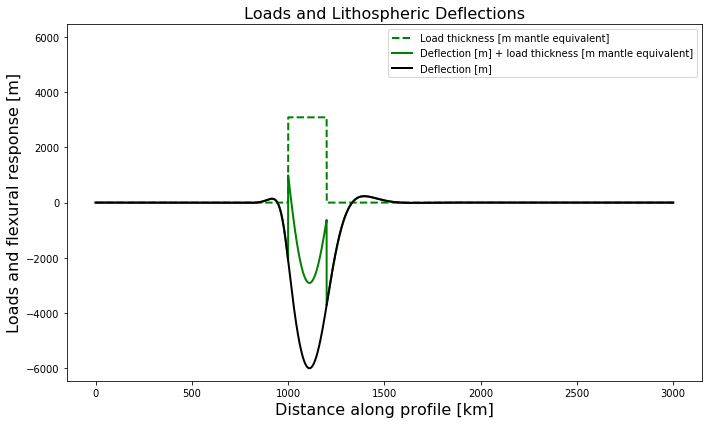

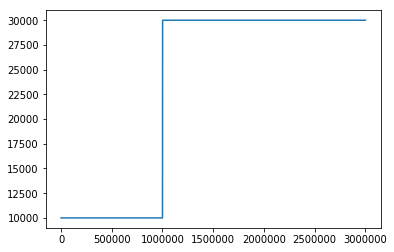

In [3]:
infinitePlateModel_main()

## Infinte plate model with input parameters

In [4]:
Te_changeZone_width_n = 100
tmp = 0.5* (Te_2-Te_1)*np.cos( np.pi*np.arange(0,Te_changeZone_width_n)/Te_changeZone_width_n)

plt.plot(tmp)

NameError: name 'Te_2' is not defined

In [5]:

def infinitePlateModel_MN_main(Te_1 = 10000., Te_2 = 30000.,Te_change_node = 15000, dx=100. , n_nodes = 30000, westernFrontalNode = 10000, easternFrontalNode = 12000, Te_changeZone_width_n = 400 , plot=True):
    flex = gflex.F1D()

    flex.Quiet = True

    flex.Method = 'FD' # Solution method: * FD (finite difference)
                       #                  * SAS (superposition of analytical solutions)
                       #                  * SAS_NG (ungridded SAS)

    flex.Solver = 'direct' # direct or iterative
    #flex.iterative_ConvergenceTolerance = 1E-3 # convergence between iterations, if an iterative solution
                         # method is chosen
    #Te_changeZone_width_n = 400
    
    flex.g = 9.8 # acceleration due to gravity
    flex.E = 65E9 # Young's Modulus
    flex.nu = 0.25 # Poisson's Ratio
    flex.rho_m = 3300. # MantleDensity
    flex.rho_fill = 1800. # InfiillMaterialDensity
    
    D_1 = flex.E*Te_1**3 / (12*(1-flex.nu**2))
    D_2 = flex.E*Te_2**3 / (12*(1-flex.nu**2))
    D_profile = D_1*np.ones(n_nodes)
    D_profile[Te_change_node:]= D_2
    D_profile[Te_change_node:Te_change_node+Te_changeZone_width_n]= 0.5*(D_2+D_1)  - 0.5* (D_2-D_1)*np.cos( np.pi*np.arange(0,Te_changeZone_width_n)/Te_changeZone_width_n) 
    flex.Te = np.cbrt(D_profile*(12*(1-flex.nu**2))/flex.E)
    
    #flex.Te = Te_1*np.ones(n_nodes) # Elastic thickness -- scalar but may be an array
    #flex.Te[Te_change_node:]= Te_2 
    #flex.Te[Te_change_node:Te_change_node+Te_changeZone_width_n]= 0.5*(Te_2+Te_1)  - 0.5* (Te_2-Te_1)*np.cos( np.pi*np.arange(0,Te_changeZone_width_n)/Te_changeZone_width_n) # surface load stresses
    #flex.Te[-3:] = 0
    flex.qs = np.zeros(n_nodes); flex.qs[westernFrontalNode: easternFrontalNode] += 1E7 # surface load stresses
    flex.dx = dx # grid cell size [m]
    flex.BC_W = '0Displacement0Slope' # west boundary condition
    flex.BC_E = '0Displacement0Slope' # east boundary condition

    flex.initialize()
    flex.run()
    flex.finalize()

    # If you want to plot the output
    flex.plotChoice='combo'
    # An output file for deflections could also be defined here
    # flex.wOutFile = 
  #  flex.output() # Plots and/or saves output, or does nothing, depending on
                  # whether flex.plotChoice and/or flex.wOutFile have been set
    # TO OBTAIN OUTPUT DIRECTLY IN PYTHON, you can assign the internal variable,
    # flex.w, to another variable -- or as an element in a list if you are looping
    # over many runs of gFlex:
    deflection = flex.w
    if(plot):
        flex.output() 
        plt.plot(flex.x,flex.Te)
    return flex.w, flex._x_local, flex.Te, flex.qs

In [6]:

def infinitePlateModel_MN_qs_main(qs=1e7, Te_1 = 10000., Te_2 = 30000.,Te_change_node = 15000, dx=100. , n_nodes = 30000, westernFrontalNode = 10000, easternFrontalNode = 12000, Te_changeZone_width_n = 400 , plot=True):
    flex = gflex.F1D()

    flex.Quiet = True

    flex.Method = 'FD' # Solution method: * FD (finite difference)
                       #                  * SAS (superposition of analytical solutions)
                       #                  * SAS_NG (ungridded SAS)

    flex.Solver = 'direct' # direct or iterative
    #flex.iterative_ConvergenceTolerance = 1E-3 # convergence between iterations, if an iterative solution
                         # method is chosen
    #Te_changeZone_width_n = 400
    
    flex.g = 9.8 # acceleration due to gravity
    flex.E = 65E9 # Young's Modulus
    flex.nu = 0.25 # Poisson's Ratio
    flex.rho_m = 3300. # MantleDensity
    flex.rho_fill = 1800. # InfiillMaterialDensity
    
    D_1 = flex.E*Te_1**3 / (12*(1-flex.nu**2))
    D_2 = flex.E*Te_2**3 / (12*(1-flex.nu**2))
    D_profile = D_1*np.ones(n_nodes)
    D_profile[Te_change_node:]= D_2
    D_profile[Te_change_node:Te_change_node+Te_changeZone_width_n]= 0.5*(D_2+D_1)  - 0.5* (D_2-D_1)*np.cos( np.pi*np.arange(0,Te_changeZone_width_n)/Te_changeZone_width_n) 
    flex.Te = np.cbrt(D_profile*(12*(1-flex.nu**2))/flex.E)
    
    #flex.Te = Te_1*np.ones(n_nodes) # Elastic thickness -- scalar but may be an array
    #flex.Te[Te_change_node:]= Te_2 
    #flex.Te[Te_change_node:Te_change_node+Te_changeZone_width_n]= 0.5*(Te_2+Te_1)  - 0.5* (Te_2-Te_1)*np.cos( np.pi*np.arange(0,Te_changeZone_width_n)/Te_changeZone_width_n) # surface load stresses
    #flex.Te[-3:] = 0
    flex.qs = np.zeros(n_nodes); flex.qs[westernFrontalNode: easternFrontalNode] += qs # surface load stresses
    flex.dx = dx # grid cell size [m]
    flex.BC_W = '0Displacement0Slope' # west boundary condition
    flex.BC_E = '0Displacement0Slope' # east boundary condition

    flex.initialize()
    flex.run()
    flex.finalize()

    # If you want to plot the output
    flex.plotChoice='combo'
    # An output file for deflections could also be defined here
    # flex.wOutFile = 
  #  flex.output() # Plots and/or saves output, or does nothing, depending on
                  # whether flex.plotChoice and/or flex.wOutFile have been set
    # TO OBTAIN OUTPUT DIRECTLY IN PYTHON, you can assign the internal variable,
    # flex.w, to another variable -- or as an element in a list if you are looping
    # over many runs of gFlex:
    deflection = flex.w
    if(plot):
        flex.output() 
        plt.plot(flex.x,flex.Te)
    return flex.w, flex._x_local, flex.Te, flex.qs

In [772]:
def infinitePlateModel_MN_qs_main(Te_1 = 10000., Te_2 = 30000.,Te_change_node = 15000, dx=100. , n_nodes = 30000, qs=-1, Te_changeZone_width_n = 400 , plot=True):
    flex = gflex.F1D()

    flex.Quiet = True

    flex.Method = 'FD' # Solution method: * FD (finite difference)
                       #                  * SAS (superposition of analytical solutions)
                       #                  * SAS_NG (ungridded SAS)

    flex.Solver = 'direct' # direct or iterative
    #flex.iterative_ConvergenceTolerance = 1E-3 # convergence between iterations, if an iterative solution
                         # method is chosen
    #Te_changeZone_width_n = 400
    
    flex.g = 9.8 # acceleration due to gravity
    flex.E = 65E9 # Young's Modulus
    flex.nu = 0.25 # Poisson's Ratio
    flex.rho_m = 3300. # MantleDensity
    flex.rho_fill = 1800. # InfiillMaterialDensity
    
    D_1 = flex.E*Te_1**3 / (12*(1-flex.nu**2))
    D_2 = flex.E*Te_2**3 / (12*(1-flex.nu**2))
    D_profile = D_1*np.ones(n_nodes)
    D_profile[Te_change_node:]= D_2
    D_profile[Te_change_node:Te_change_node+Te_changeZone_width_n]= 0.5*(D_2+D_1)  - 0.5* (D_2-D_1)*np.cos( np.pi*np.arange(0,Te_changeZone_width_n)/Te_changeZone_width_n) 
    flex.Te = np.cbrt(D_profile*(12*(1-flex.nu**2))/flex.E)
    
    #flex.Te = Te_1*np.ones(n_nodes) # Elastic thickness -- scalar but may be an array
    #flex.Te[Te_change_node:]= Te_2 
    #flex.Te[Te_change_node:Te_change_node+Te_changeZone_width_n]= 0.5*(Te_2+Te_1)  - 0.5* (Te_2-Te_1)*np.cos( np.pi*np.arange(0,Te_changeZone_width_n)/Te_changeZone_width_n) # surface load stresses
    #flex.Te[-3:] = 0
    flex.qs = qs
    flex.dx = dx # grid cell size [m]
    flex.BC_W = '0Displacement0Slope' # west boundary condition
    flex.BC_E = '0Displacement0Slope' # east boundary condition

    flex.initialize()
    flex.run()
    flex.finalize()

    # If you want to plot the output
    flex.plotChoice='combo'
    # An output file for deflections could also be defined here
    # flex.wOutFile = 
  #  flex.output() # Plots and/or saves output, or does nothing, depending on
                  # whether flex.plotChoice and/or flex.wOutFile have been set
    # TO OBTAIN OUTPUT DIRECTLY IN PYTHON, you can assign the internal variable,
    # flex.w, to another variable -- or as an element in a list if you are looping
    # over many runs of gFlex:
    deflection = flex.w
    if(plot):
        flex.output() 
        plt.plot(flex.x,flex.Te)
    return flex.w, flex._x_local, flex.Te, flex.qs

In [7]:
Te_change_node = 11000
n_nodes = 30000
dx = 500.

Te_changeZone_width_n = 100

orogenWidth_km = 200.  #[km]
orogenWidth_nodes = int( np.floor( 200. * 1000. / dx ) )  #[km]

initial_westernFrontalNode = 10000
initial_easternFrontalNode = initial_westernFrontalNode + orogenWidth_nodes

easternFrontalNode = initial_easternFrontalNode
westernFrontalNode = initial_westernFrontalNode


z, x, Te, qs = infinitePlateModel_MN_main(Te_1 = Te_1, Te_2 = Te_2, Te_change_node = Te_change_node, Te_changeZone_width_n=Te_changeZone_width_n, dx=dx , n_nodes = n_nodes, westernFrontalNode = westernFrontalNode, easternFrontalNode = easternFrontalNode, plot=True)
    

NameError: name 'Te_1' is not defined

In [774]:
E = 65E9
nu = 0.25

D = E*Te**3 / (12*(1-nu**2))

dD_dx = np.zeros_like(D)
d2D_dx2 = np.zeros_like(D)

w=z
d2w_dx2 = np.zeros_like(D)
d3w_dx3 = np.zeros_like(D)
d4w_dx4 = np.zeros_like(D)

dD_dx[1:-1] =  (D[2:] - D[:-2]) / dx
d2D_dx2[2:-2] =  ( -D[4:] + 16*D[3:-1] - 30* D[2:-2] + 16*D[1:-3] - D[:-4] ) / (12 * dx**2)

d2w_dx2[2:-2] =  ( -w[4:] + 16*w[3:-1] - 30* w[2:-2] + 16*w[1:-3] - w[:-4] ) / (12 * dx**2)
d3w_dx3[2:-2] =  ( w[4:] -2*w[3:-1]  + 2*w[1:-3] - w[:-4] ) / (2 * dx**3)
d4w_dx4[2:-2] =  ( w[4:] -4*w[3:-1] +6* w[2:-2] -4*w[1:-3] + w[:-4] ) / (dx**4)

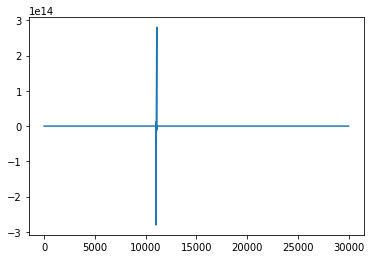

In [775]:
plt.plot(d2D_dx2)

Text(0.5,0,'x [nodes]')

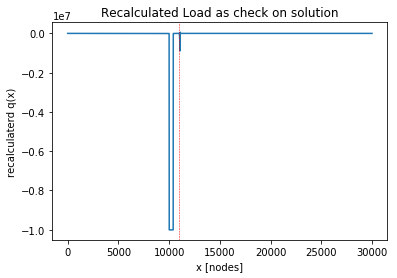

In [776]:
delRho = 3300 - 1800
g = 9.81

q = D * d4w_dx4 + 2 * dD_dx * d3w_dx3 + d2D_dx2 * d2w_dx2 + delRho * g * w

plt.plot(q)
plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.title("Recalculated Load as check on solution")
plt.ylabel("recalculaterd q(x)")
plt.xlabel("x [nodes]")

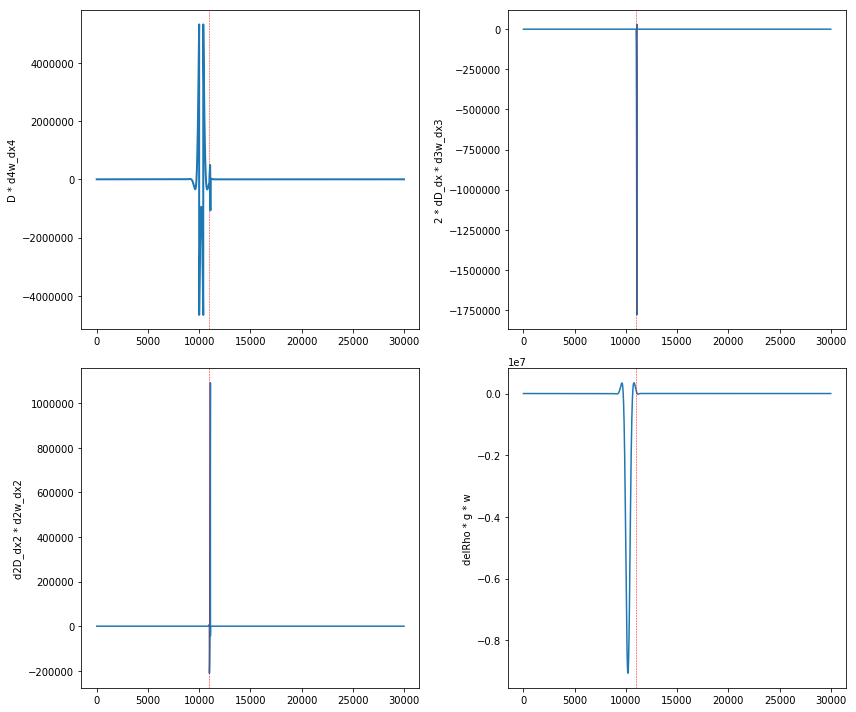

In [777]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.plot(D * d4w_dx4, linewidth=2)
plt.ylabel("D * d4w_dx4")

plt.subplot(2,2,2)
plt.plot(2 * dD_dx * d3w_dx3)
plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.ylabel("2 * dD_dx * d3w_dx3")

plt.subplot(2,2,3)
plt.plot(d2D_dx2 * d2w_dx2)
plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.ylabel("d2D_dx2 * d2w_dx2")

plt.subplot(2,2,4)
plt.plot(delRho * g * w)
plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.ylabel("delRho * g * w")

plt.tight_layout()

## NEW Timestepping

('Width of Te change zone:', 40.0, ' km')


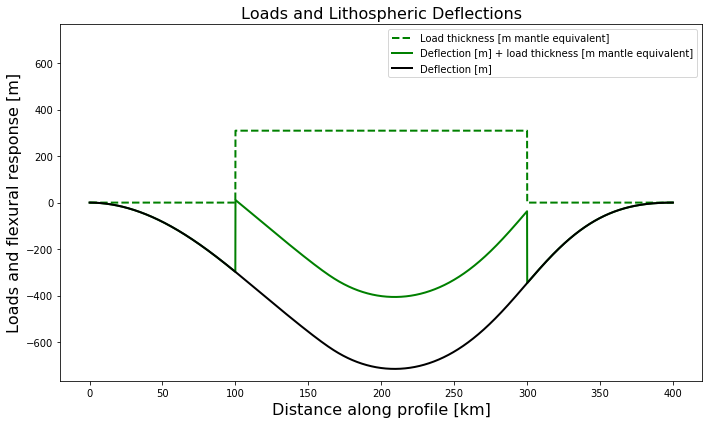

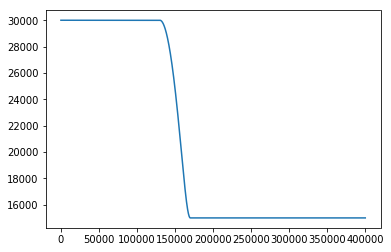

In [11]:
Te_change_node = 1300
n_nodes = 4000

Te_changeZone_width_n = 400
dx = 100.

Te_1 = 30000
Te_2 = 15000

print("Width of Te change zone:", Te_changeZone_width_n*dx/1000, ' km')

orogenWidth_km = 200.  #[km]
orogenWidth_nodes = int( np.floor( 200. * 1000. / dx ) )  #[km]

initial_westernFrontalNode = 1000
initial_easternFrontalNode = initial_westernFrontalNode + orogenWidth_nodes

easternFrontalNode = initial_easternFrontalNode
westernFrontalNode = initial_westernFrontalNode


z, x, Te, qs = infinitePlateModel_MN_main(Te_1 = Te_1, Te_2 = Te_2, Te_change_node = Te_change_node, Te_changeZone_width_n=Te_changeZone_width_n, dx=dx , n_nodes = n_nodes, westernFrontalNode = westernFrontalNode, easternFrontalNode = easternFrontalNode, plot=True)

In [12]:
E = 65E9
nu = 0.25

D = E*Te**3 / (12*(1-nu**2))

dD_dx = np.zeros_like(D)
d2D_dx2 = np.zeros_like(D)

w=z
d2w_dx2 = np.zeros_like(D)
d3w_dx3 = np.zeros_like(D)
d4w_dx4 = np.zeros_like(D)

dD_dx[1:-1] =  (D[2:] - D[:-2]) / dx
d2D_dx2[2:-2] =  ( -D[4:] + 16*D[3:-1] - 30* D[2:-2] + 16*D[1:-3] - D[:-4] ) / (12 * dx**2)

d2w_dx2[2:-2] =  ( -w[4:] + 16*w[3:-1] - 30* w[2:-2] + 16*w[1:-3] - w[:-4] ) / (12 * dx**2)
d3w_dx3[2:-2] =  ( w[4:] -2*w[3:-1]  + 2*w[1:-3] - w[:-4] ) / (2 * dx**3)
d4w_dx4[2:-2] =  ( w[4:] -4*w[3:-1] +6* w[2:-2] -4*w[1:-3] + w[:-4] ) / (dx**4)

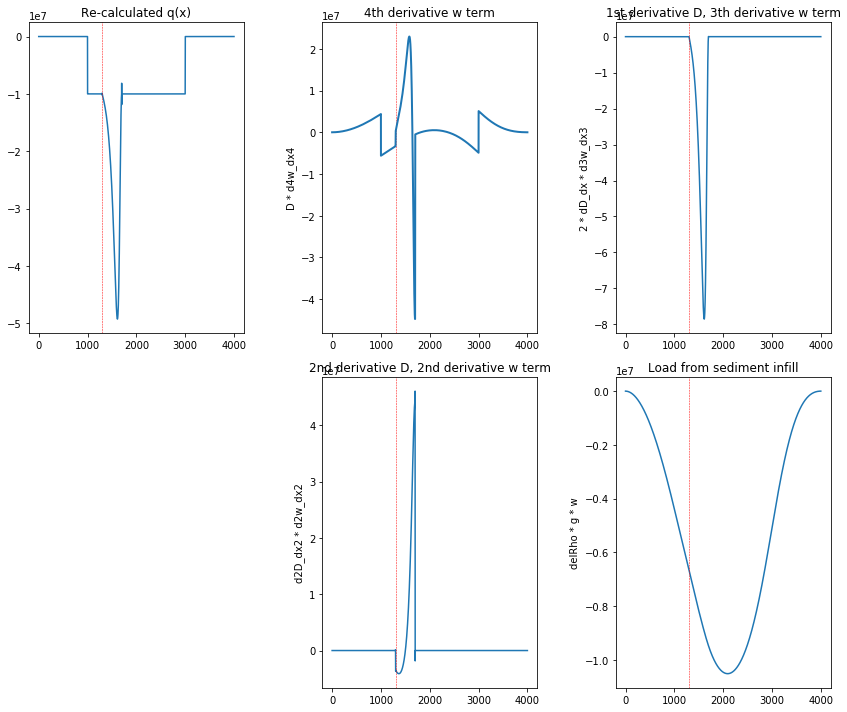

In [13]:
delRho = 3300 - 1800
g = 9.81

q = D * d4w_dx4 + 2 * dD_dx * d3w_dx3 + d2D_dx2 * d2w_dx2 + delRho * g * w

plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
plt.plot(q)
plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.title("Re-calculated q(x)")

plt.subplot(2,3,2)
plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.plot(D * d4w_dx4, linewidth=2)
plt.ylabel("D * d4w_dx4")
plt.title("4th derivative w term")

plt.subplot(2,3,3)
plt.plot(2 * dD_dx * d3w_dx3)
plt.ylabel("2 * dD_dx * d3w_dx3")
plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.title("1st derivative D, 3th derivative w term")

plt.subplot(2,3,5)
plt.plot(d2D_dx2 * d2w_dx2)
plt.ylabel("d2D_dx2 * d2w_dx2")
plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.title("2nd derivative D, 2nd derivative w term")

plt.subplot(2,3,6)
plt.plot(delRho * g * w)
plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.ylabel("delRho * g * w")
plt.title("Load from sediment infill")

plt.tight_layout()


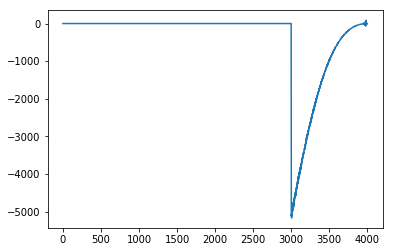

In [14]:
newLoad = np.zeros(n_nodes)
newLoad[initial_easternFrontalNode:] = q[initial_easternFrontalNode:] 
plt.plot(newLoad)

[-0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6
 16.8 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4
 19.6 19.8 20.  20.2 20.4 20.6 20.8 21.  21.2 21.4 21.6 21.8 22.  22.2
 22.4 22.6 22.8 23.  23.2 23.4 23.6 23.8 24.  24.2 24.4 24.6 24.8 25.
 25.2 25.4 25.6 25.8 26.  26.2 26.4 26.6 26.8 27.  27.2 27.4 27.6 27.8
 28.  28.2 28.4 28.6 28.8 29.  29.2 29.4 29.6 29.8 30.  30.2 30.4 30.6
 30.8 31.  31.2 31.4 31.6 31.8 32.  32.2 32.4 32.6 32.8 33.  33.2 33.4
 33.6 33.8 34.  34.2 34.4 34.6 34.8 35.  35.2 35.4 35.6 35.8 36.  36.2
 36.4 36.6 36.8 37.  37.2 37.4 37.6 37.8 38.  38.2 38.4 38.6 38.8 39.
 39.2 39.

Text(0,0.5,'Te change node')

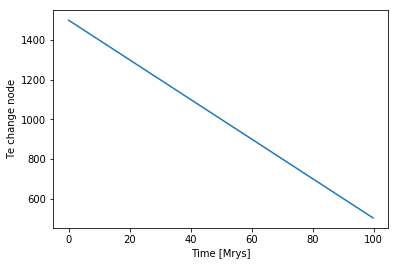

In [782]:
convergenceRate = 10000. # m/Myr

Te_changeNode_List = np.arange(1500, 500, -2)
time_List = -dx*(Te_changeNode_List - 1500) / convergenceRate

n_outputTimesteps = len(Te_changeNode_List)      # Number of timesteps to evaluate over

print(time_List)
plt.plot(time_List, Te_changeNode_List)
plt.xlabel("Time [Mrys]")
plt.ylabel("Te change node")

In [783]:
### Example calculation of the position of the basin locations

x_DF = x[initial_easternFrontalNode]

## Code to find initial forebulge
n_FB = np.argmax( z[initial_easternFrontalNode:] ) + initial_easternFrontalNode
x_FB = x[n_FB ]

n_BM = np.argmin( z[initial_easternFrontalNode:n_FB]**2 ) + initial_easternFrontalNode
x_BM = x[n_BM]

## Record initial values
x_FB_initial = x_FB
x_BM_initial = x_BM
x_DF_initial = x_DF

## Basin Width
deltaX_DF_2_FB = x_FB - x_DF

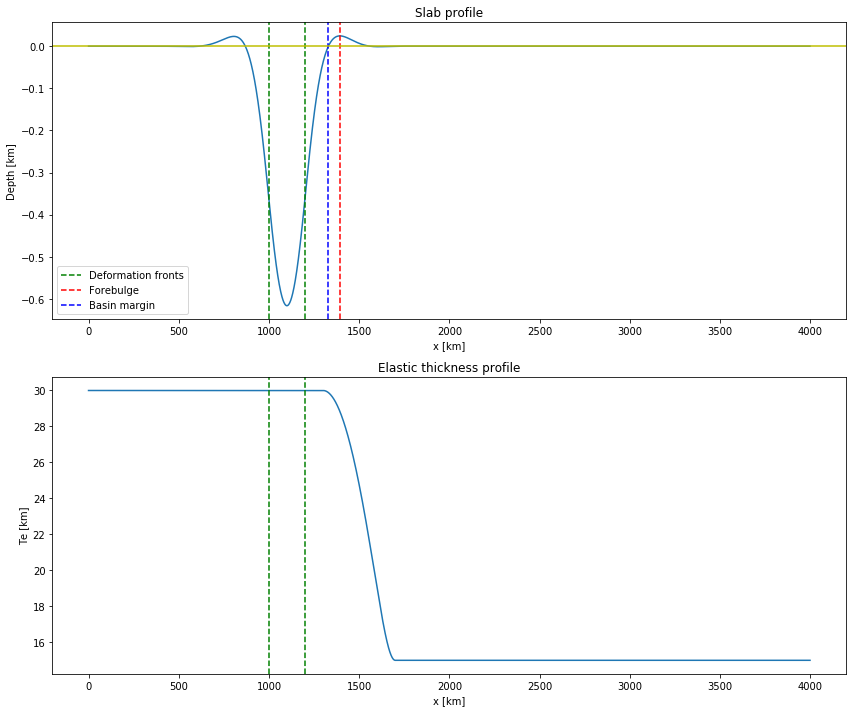

In [784]:
plt.figure(figsize=(12,10))

m2km = 1/1000.
x_km = x/1000.

plt.subplot(2,1,1)
plt.plot(x_km,z*m2km)

plt.axvline(x=x[initial_westernFrontalNode]*m2km, c='g', linestyle='--', label="Deformation fronts")
plt.axvline(x=x[initial_easternFrontalNode]*m2km, c='g', linestyle='--')

plt.axvline(x=x_FB*m2km, c='r', linestyle='--', label="Forebulge")
plt.axvline(x=x_BM*m2km, c='b', linestyle='--', label="Basin margin")

plt.axhline(y=0, c='y')

plt.legend()

plt.xlabel("x [km]")
plt.ylabel("Depth [km]")
plt.title("Slab profile")


plt.subplot(2,1,2)
plt.plot(x_km,Te*m2km)
plt.xlabel("x [km]")
plt.ylabel("Te [km]")
plt.title("Elastic thickness profile")

plt.axvline(x=x[initial_westernFrontalNode]*m2km, c='g', linestyle='--')
plt.axvline(x=x[initial_easternFrontalNode]*m2km, c='g', linestyle='--')

plt.tight_layout()

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

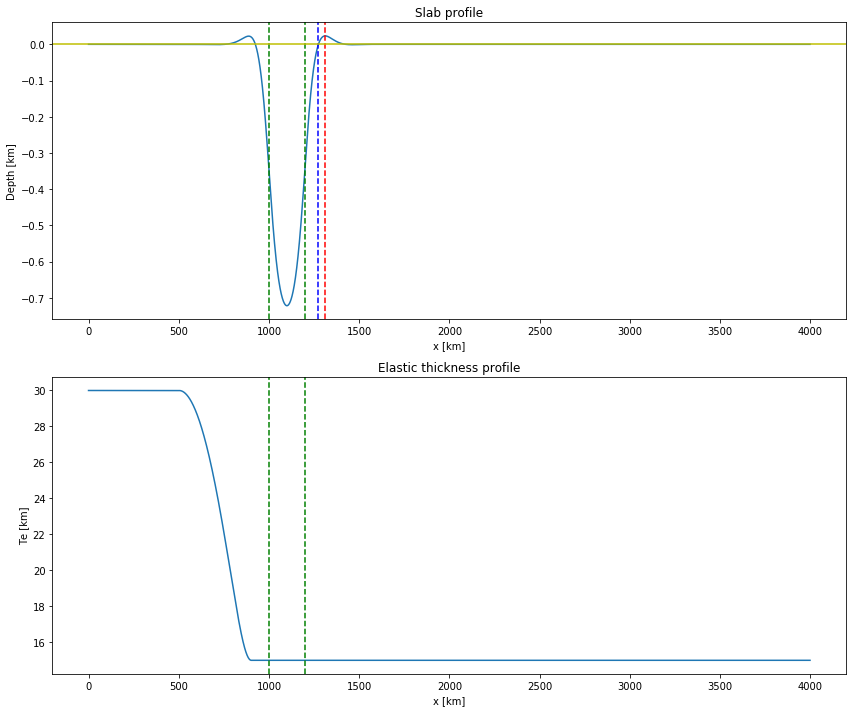

In [785]:
x_basinMargin = np.empty( n_outputTimesteps )
n_basinMargin = np.empty_like( x_basinMargin )
x_deformationFront = np.empty_like( x_basinMargin )
x_highestPoint = np.empty_like( x_basinMargin )
z_deformationFront = np.empty_like( x_basinMargin )
z_highestPoint = np.empty_like( x_basinMargin )
basin_width = np.empty_like( x_basinMargin )

numberOfStratNodes = n_nodes - initial_easternFrontalNode
depthToSlab = np.empty( (n_outputTimesteps, numberOfStratNodes) )

plotAnim = False

for n in range(0,n_outputTimesteps):
    Te_change_node = Te_changeNode_List[n]
    t = time_List[n]
    
    print("Iteration: "+str(n))

    z, x, Te, qs = infinitePlateModel_MN_main(Te_1 = Te_1, Te_2 = Te_2, Te_change_node = Te_change_node, Te_changeZone_width_n=Te_changeZone_width_n, dx=dx , n_nodes = n_nodes, westernFrontalNode = westernFrontalNode, easternFrontalNode = easternFrontalNode, plot=False)
    x_DF = x[initial_easternFrontalNode]
    z_DF = z[initial_easternFrontalNode]

    ## Code to find initial forebulge
    n_FB = np.argmax( z[initial_easternFrontalNode:] ) + initial_easternFrontalNode
    x_FB = x[n_FB ]
    z_FB = z[n_FB ]

    n_BM = np.argmin( z[initial_easternFrontalNode:n_FB]**2 ) + initial_easternFrontalNode
    x_BM = x[n_BM]
    z_BM = z[n_BM ]
    
    depthToSlab[n,: n_BM-initial_easternFrontalNode] = z[initial_easternFrontalNode:n_BM]
    
    ## Basin Width
    deltaX_DF_2_FB = x_FB - x_DF

    x_basinMargin[n] = x_BM
    n_basinMargin[n] = n_BM

    ## Store DF position with time
    x_deformationFront[n] = x_DF
    z_deformationFront[n] = z_DF

    ## Store the position of the highest point with time
    x_highestPoint[n] = x_FB
    z_highestPoint[n] = z_FB
    
    basin_width[n] = deltaX_DF_2_FB
    
    if(plotAnim):
        m2km = 1/1000.
        x_km = x/1000.
        
        plt.figure(figsize=(12,10))
        plt.subplot(2,1,1)
        plt.plot(x_km,z*m2km, hold=False)

        plt.axvline(x=x[initial_westernFrontalNode]*m2km, c='g', linestyle='--', label="Deformation fronts")
        plt.axvline(x=x[initial_easternFrontalNode]*m2km, c='g', linestyle='--')

        plt.axvline(x=x_FB*m2km, c='r', linestyle='--', label="Forebulge")
        plt.axvline(x=x_BM*m2km, c='b', linestyle='--', label="Basin margin")

        plt.axhline(y=0, c='y')

        #plt.legend()

        plt.xlabel("x [km]")
        plt.ylabel("Depth [km]")
        plt.title("Slab profile")


        plt.subplot(2,1,2)
        plt.plot(x_km,Te*m2km, hold=False)
        plt.xlabel("x [km]")
        plt.ylabel("Te [km]")
        plt.title("Elastic thickness profile")

        plt.axvline(x=x[initial_westernFrontalNode]*m2km, c='g', linestyle='--')
        plt.axvline(x=x[initial_easternFrontalNode]*m2km, c='g', linestyle='--')

        plt.tight_layout()
        
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.5) # necessary to get the plot up.
        

m2km = 1/1000.
x_km = x/1000.

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(x_km,z*m2km, hold=False)

plt.axvline(x=x[initial_westernFrontalNode]*m2km, c='g', linestyle='--', label="Deformation fronts")
plt.axvline(x=x[initial_easternFrontalNode]*m2km, c='g', linestyle='--')

plt.axvline(x=x_FB*m2km, c='r', linestyle='--', label="Forebulge")
plt.axvline(x=x_BM*m2km, c='b', linestyle='--', label="Basin margin")

plt.axhline(y=0, c='y')

#plt.legend()

plt.xlabel("x [km]")
plt.ylabel("Depth [km]")
plt.title("Slab profile")


plt.subplot(2,1,2)
plt.plot(x_km,Te*m2km, hold=False)
plt.xlabel("x [km]")
plt.ylabel("Te [km]")
plt.title("Elastic thickness profile")

plt.axvline(x=x[initial_westernFrontalNode]*m2km, c='g', linestyle='--')
plt.axvline(x=x[initial_easternFrontalNode]*m2km, c='g', linestyle='--')

plt.tight_layout()




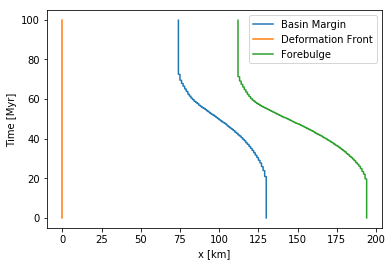

In [786]:
plt.plot(x_basinMargin*m2km- x_deformationFront*m2km, time_List, label="Basin Margin")
plt.plot(x_deformationFront*m2km- x_deformationFront*m2km, time_List, label="Deformation Front")
plt.plot(x_highestPoint*m2km- x_deformationFront*m2km, time_List, label="Forebulge")

plt.xlabel("x [km]" )
plt.ylabel("Time [Myr]" )
plt.legend()

In [787]:
plt.plot(z_deformationFront*m2km, time_List, label="Depth at Deformation Front")
plt.plot(z_highestPoint*m2km, time_List, label="Height of Forebulge")

plt.xlabel("z [km]" )
plt.ylabel("Time [Myr]" )
plt.legend()

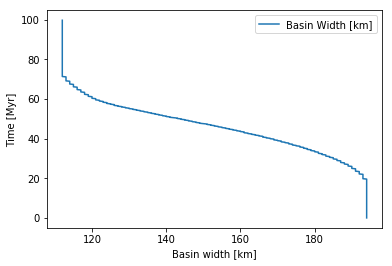

In [788]:
plt.plot(basin_width*m2km, time_List, label="Basin Width [km]")
plt.xlabel("Basin width [km]")
plt.ylabel("Time [Myr]" )
plt.legend()

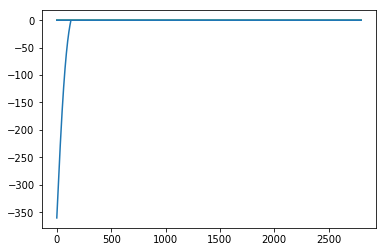

In [789]:
timeSlice = 10

slabProfile = depthToSlab[timeSlice]
plt.plot( slabProfile )
for i in range(timeSlice):
    plt.plot( slabProfile - depthToSlab[i])